**Image cutouts and resizing**  
@Author: Ray  
@Cite: [astropy.nddata](https://docs.astropy.org/en/stable/nddata/index.html#module-astropy.nddata) package  
@Time: 2022.07.10  
@Describe:  
* cutout: 从一个大的FITS图像中，根据目标源的位置，将其扣下来存成新的FITS文件  
* 官方文档[2D Cutout Images](https://docs.astropy.org/en/stable/nddata/utils.html#cutout-images)

In [1]:
import os
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord

# ^ 禁用同一单元格内的输出覆盖
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Original image

In [2]:
# open the FITS image
hdul = fits.open("./data/example_cutouts/hlsp_3d-dash_hst_wfc3_combined-t10.11-cosmos_f160w_v1.0_drz-sci.fits")
hdul.info()

# 读取data, header
hdu = hdul[0]
data = hdu.data
header = hdu.header
# 用header创建wcs，用于pixel和ra/dec的转换
wcs = WCS(header)

Filename: ./data/example_cutouts/hlsp_3d-dash_hst_wfc3_combined-t10.11-cosmos_f160w_v1.0_drz-sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     220   (4096, 4096)   float32   


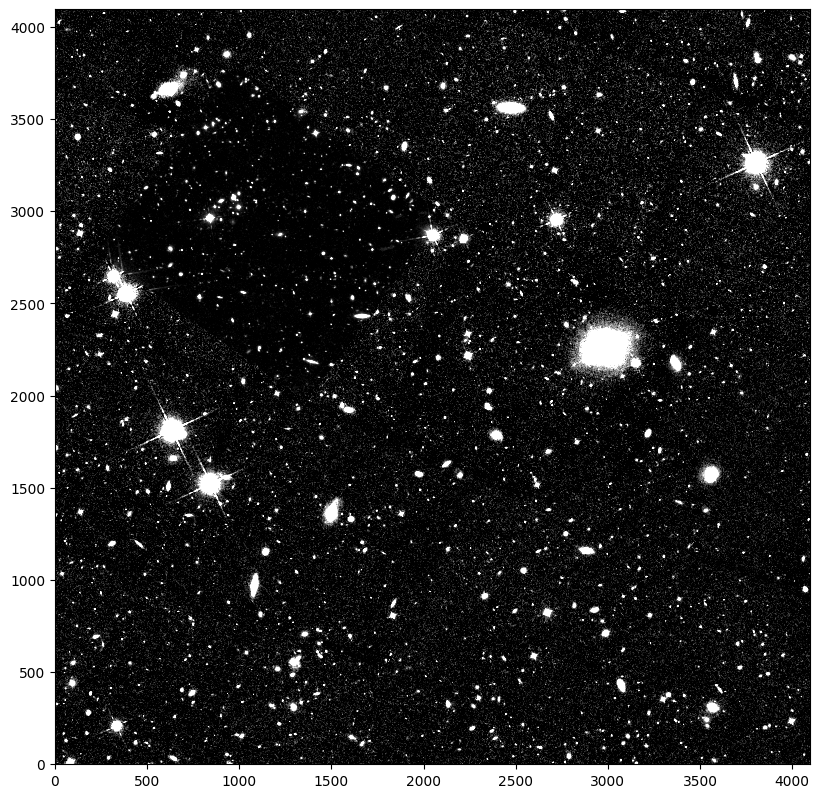

In [3]:
# plot the original image
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.imshow(data, vmin=0, vmax=0.1, cmap='gray', origin='lower')

## [Cutout2D](https://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html#astropy.nddata.Cutout2D)

使用pixels表示目标中心位置

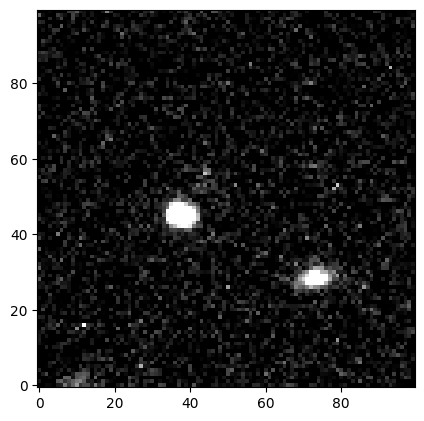

In [4]:
# set center_coordinate and size
position = (1210, 2600) # pixels
size = (100, 100)  # pixels

cutout = Cutout2D(data=data, position=position, size=size)

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.imshow(cutout.data, vmin=0, vmax=0.1, cmap='gray', origin='lower')

In [5]:
# 将像素坐标转换为赤道坐标，用于下面按赤道坐标定位目标源的练习
(x, y) = position
coord = wcs.pixel_to_world(x, y)
ra = coord.ra.value
dec = coord.dec.value
print("="*20 + " 目标源坐标 " + "="*20)
print("(x, y) = ({}, {})".format(x, y))
print("(ra, dec) = ({}, {})".format(ra, dec))

==================== 目标源坐标 ====================
(x, y) = (1210, 2600)
(ra, dec) = (149.82254244908196, 2.645541700161015)


使用ra/dec表示目标中心位置

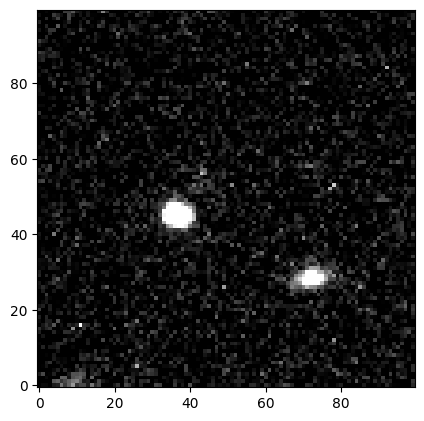

In [6]:
# set center_coordinate and size
coord = SkyCoord(149.822542, 2.645541, unit='deg') # pixels
size = (100, 100)  # pixels

cutout = Cutout2D(data=data, position=coord, size=size, wcs=wcs)  # 用ra/dec时需要加上wcs参数

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.imshow(cutout.data, vmin=0, vmax=0.1, cmap='gray', origin='lower')

`plot_on_original`: cutout在原图中的位置

<AxesSubplot:>

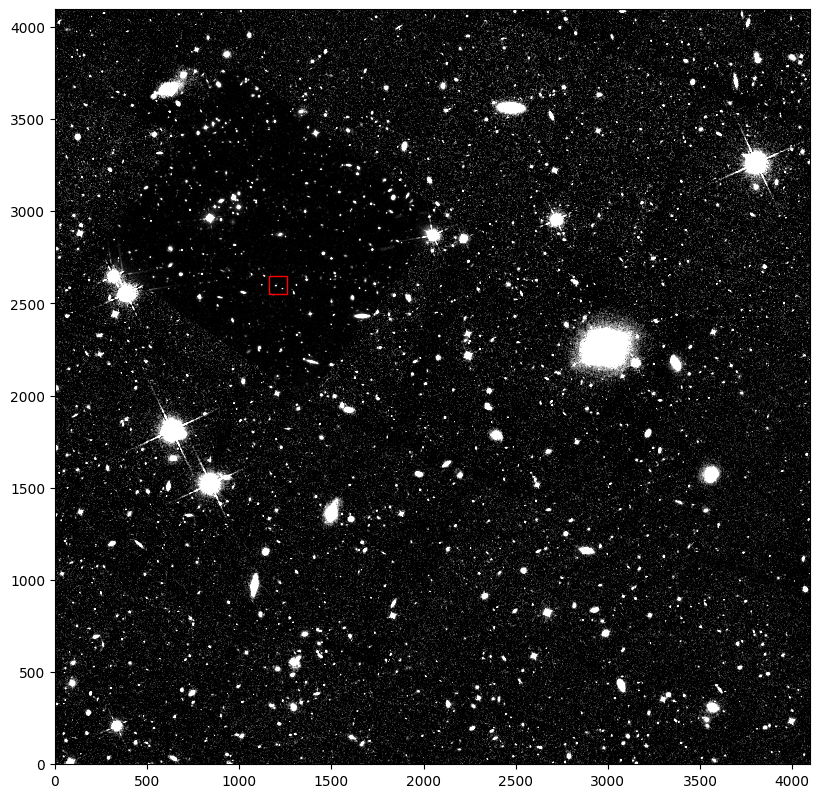

In [7]:
# 画出cutout在原始图像中的位置
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.imshow(data, vmin=0, vmax=0.1, cmap='gray', origin='lower')
cutout.plot_on_original(ax=ax, color='red')

输出cutout的一些信息

In [8]:
# print some information

print("1. cutout的形状:")
cutout.shape

print("2. cutout的目标中心在原图上的像素坐标(取整后的):")
cutout.position_original

print("3. cutout的目标中心在原图上的像素坐标(input没取整):")
cutout.input_position_original

print("4. cutout的目标中心在cutout上的像素坐标(input没取整):")
cutout.input_position_cutout

print("5. cutout中的坐标(40, 40)在原图中的坐标:")
cutout.to_original_position((40, 40))

print("6. 原图坐标(1201, 2590)在cutout中的坐标:")
cutout.to_cutout_position((1201, 2590))


1. cutout的形状:


(100, 100)

2. cutout的目标中心在原图上的像素坐标(取整后的):


(1210, 2600)

3. cutout的目标中心在原图上的像素坐标(input没取整):


(array(1210.01615496), array(2599.97479603))

4. cutout的目标中心在cutout上的像素坐标(input没取整):


(49.01615495645456, 49.97479603121246)

5. cutout中的坐标(40, 40)在原图中的坐标:


(1201, 2590)

6. 原图坐标(1201, 2590)在cutout中的坐标:


(40, 40)

# Saving a Cutout to a FITS File

In [9]:
hdu_cutout = hdu.copy() # 创建原图hdu的副本

hdu_cutout.data = cutout.data  # 存入cutout的数据
hdu_cutout.header.update(cutout.wcs.to_header())  # 更新FITS头

cutout_filename = "07_image_cutout.fits"
hdu_cutout.writeto(os.path.join("./out", cutout_filename), overwrite=True)

In [10]:
# check
hdul_out = fits.open(os.path.join("./out", cutout_filename))
hdul_out.info()

Filename: ./out/07_image_cutout.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     223   (100, 100)   float32   


In [11]:
hdul_out[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =             -9352.75 / Pixel coordinate of reference point            
CRPIX2  =            -14837.75 / Pixel coordinate of reference point            
CD1_1   = -2.7777777777776E-05 / Coordinate transformation matrix element       
CD2_2   =  2.7777777777778E-05 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'             

In [12]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =             -8191.75 / Pixel coordinate of reference point            
CRPIX2  =            -12287.75 / Pixel coordinate of reference point            
CD1_1   = -2.7777777777776E-05 / Coordinate transformation matrix element       
CD2_2   =  2.7777777777778E-05 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'             